In [ ]:
'''%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = cat_df_flights['carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()'''

In [6]:
!pip install scikit-image

     |████████████████████████████████| 26.2MB 12.0MB/s eta 0:00:01   |█▊                              | 1.4MB 1.4MB/s eta 0:00:18     |█████▍                          | 4.4MB 1.4MB/s eta 0:00:16     |███████▉                        | 6.4MB 1.4MB/s eta 0:00:14     |████████████▏                   | 9.9MB 9.0MB/s eta 0:00:02     |████████████████                | 13.0MB 9.0MB/s eta 0:00:02     |███████████████████████▏        | 19.0MB 9.0MB/s eta 0:00:01     |█████████████████████████▌      | 20.8MB 12.0MB/s eta 0:00:01     |█████████████████████████▉      | 21.2MB 12.0MB/s eta 0:00:01     |██████████████████████████▎     | 21.5MB 12.0MB/s eta 0:00:01     |██████████████████████████▊     | 21.9MB 12.0MB/s eta 0:00:01     |█████████████████████████████▏  | 23.9MB 12.0MB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 11.0MB/s eta 0:00:01
     |████████████████████████████████| 2.1MB 8.4MB/s eta 0:00:01     |█████                           | 317kB 8.4MB/s eta 0:00:01     |████

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras import datasets, layers, models, regularizers, initializers
from skimage.io import imshow
from skimage.transform import rotate
from skimage.filters.edges import convolve

from skimage.io import imshow, imread
from skimage.transform import resize
from skimage.color import rgb2gray

np.random.seed(33)

In [7]:
df = pd.read_csv('data/labels_df.csv')

In [15]:
loaded = np.load('data/image_array.npz')
all_img = loaded['a']
bw_img = loaded['b']

In [8]:
labels = df.masterCategory.copy()
labels = labels.astype('category')
labels = labels.cat.codes

In [18]:
masterCat_dict = {}
for i in range(len(labels.value_counts().index)):
    s = labels.value_counts().index[i]
    t = df.masterCategory.value_counts().index[i]
    masterCat_dict[t] = s
masterCat_dict    

{'Apparel': 1,
 'Accessories': 0,
 'Footwear': 2,
 'Personal Care': 5,
 'Free Items': 3,
 'Sporting Goods': 6,
 'Home': 4}

In [22]:
#shuffle images and target var
i = np.random.choice( np.arange(len(bw_img)), size=len(bw_img), replace=False)
images = [bw_img[ix] for ix in i]
X = bw_img[i, :]
y = labels.values[i]

In [25]:
X.shape, y.shape

((43987, 4800), (43987,))

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve, roc_curve

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [34]:
clf = RandomForestClassifier(n_estimators = 100, random_state=33)

In [35]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=33, verbose=0, warm_start=False)

In [36]:
yhat = clf.predict(X_test)
print( accuracy_score(y_test, yhat) )

0.9785396017095571


In [51]:
yproba = clf.predict_proba(X_test)

In [49]:
recall_score(y_test, yhat, average='weighted')

0.9785396017095571

In [48]:
recall_score(y_test, yhat, average='micro')

0.9785396017095571

In [89]:
clf.decision_path(X_test)

(<10997x184934 sparse matrix of type '<class 'numpy.int64'>'
 	with 20554423 stored elements in Compressed Sparse Row format>,
 array([     0,   1915,   3924,   5799,   7614,   9529,  11432,  13245,
         15096,  16837,  18598,  20391,  22116,  24107,  26036,  27899,
         29780,  31691,  33490,  35417,  37132,  38925,  40776,  42749,
         44504,  46323,  48142,  50053,  51756,  53603,  55518,  57451,
         59198,  61095,  62950,  64809,  66702,  68597,  70444,  72313,
         74312,  76233,  78080,  79933,  81850,  83681,  85540,  87265,
         89198,  90991,  92658,  94487,  96396,  98259, 100114, 101991,
        103828, 105603, 107482, 109221, 110972, 112803, 114624, 116451,
        118246, 120175, 122090, 123793, 125654, 127601, 129530, 131347,
        133144, 134979, 136732, 138605, 140498, 142411, 144300, 146109,
        147882, 149569, 151386, 153223, 155034, 156975, 158846, 160767,
        162666, 164473, 166300, 168135, 169912, 171869, 173774, 175599,
        1

In [117]:
wrong_id_list = []
pred_cat_list = []
real_cat_list = []
for row_idx in range(len(y_test)):
    if y_test[row_idx]!=yhat[row_idx]:
        wrong_id_list.append(row_idx)
        pred_cat_list.append(yhat[row_idx])
        real_cat_list.append(y_test[row_idx])

arr = np.array([pred_cat_list, real_cat_list])
arr = arr.transpose()

wrong_df = pd.DataFrame( arr, index= wrong_id_list, columns = ['predicted', 'actual'] )
wrong_df.head()

,predicted,actual
65,1,0
114,0,5
264,0,3
272,1,0
428,1,0


(236, 2)

In [63]:
precision, recall, thresholds = precision_recall_curve(y_test, yproba[:,1], pos_label=1)

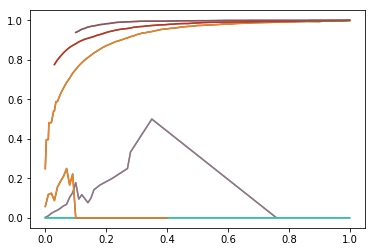

In [88]:
# Funny looking, but not particularly useful
precision_list = []
recall_list = []
thresh_list = []
for i in range(6):
    p, r, t = precision_recall_curve(y_test, yproba[:,i], pos_label=i)
    precision_list.append(p[:-1])
    recall_list.append(r[:-1])
    thresh_list.append(t)
    #print(p.shape)
    #print(t.shape)
    plt.plot( thresh_list[i], precision_list[i])
    plt.plot( thresh_list[i], precision_list[i])


In [ ]:
fig, axs = plt.subplots(3,7, figsize=(16,8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow( all_img[topwear_idx[i]].reshape(80,60,3)/255 )
    #print(topwear_idx[i])
    ax.set_xticks([])
    ax.set_yticks([])